In [ ]:
#len(set(sc_df.index).intersection(gloc.index)) #24826 - 54 = 24772 # before filtering out chromosomes
#len(set(sc_df_filtered.index).intersection(gloc.index)) # 24083 - 38 = 24045
##set(sc_df_filtered.index) - set(gloc.index)
##set(sc_df.index) - set(gloc.index)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [31]:
excl_chrom = ['chrM','chrX','chrY']

#sc_df = pd.read_csv("../data/single_cell_tpm.tsv",sep="\t",index_col=0)
sc_df = pd.read_csv("../data/ENCODE_bulk_rna_seq.csv",index_col=0) # read in single cell TPM counts
sc_df = sc_df.loc[[idx for idx in sc_df.index if 'ENSMUSG' in idx]]
gloc = pd.read_csv("../data/gene_locations.tsv",sep="\t",index_col=0) # read in gene location information
tad_locs = pd.read_csv("../data/TAD_strong_boundary_start_end.csv") # read in TAD location information

# index manipulation
sc_df_idx = [idx.split(".")[0] for idx in sc_df.index]
sc_df.index = sc_df_idx

gloc_idx = [idx.split(".")[0] for idx in gloc.index]
gloc.index = gloc_idx

# filter out genes with 0 TPM in all cells
sc_df_filtered = sc_df.loc[np.sum(sc_df,axis=1)!=0]
chromosomes = set(gloc.seqname).difference(excl_chrom)
gloc_filtered = gloc[gloc['seqname'].isin(chromosomes)]
tad_locs = tad_locs[tad_locs['chrom'].isin(chromosomes)]


# get intersecting genes
gene_list = set(sc_df_filtered.index).intersection(gloc_filtered.index)
sc_df_filtered = sc_df_filtered.loc[gene_list]
gloc_filtered = gloc_filtered.loc[gene_list]

In [32]:
len(gene_list)

37253

In [27]:
gloc_filtered

,seqname,start,end,gene_name
ENSMUSG00000081258,chr2,106265307,106265576,Gm14013
ENSMUSG00000048478,chr8,123212832,123222046,Spata33
ENSMUSG00000112606,chr12,80613296,80613614,Gm46364
ENSMUSG00000107344,chr15,12031565,12031927,Gm2559
ENSMUSG00000060992,chr15,103272714,103299868,Copz1
...,...,...,...,...
ENSMUSG00000068735,chr2,93187548,93201759,Trp53i11
ENSMUSG00000106391,chr5,100429726,100431561,Gm42690
ENSMUSG00000108251,chr6,140033161,140033532,Gm44112
ENSMUSG00000036104,chr1,127868773,127943868,Rab3gap1


In [ ]:
gloc_filtered[gloc_filtered.seqname=='chr1']

In [ ]:
tad_locs

In [ ]:
sc1 = sc_df_filtered.loc[gloc_filtered[gloc_filtered['seqname']=='chr1'].index]


In [ ]:
len(tad_locs)

In [ ]:
tad_locs.loc[0]['start']

In [ ]:
sc_df_filtered.loc[gloc_filtered[gloc_filtered['seqname']=='chr1'].index]

In [ ]:
sc_df_filtered.loc[gloc[gloc['seqname']=='chr1'].index]

In [ ]:
zscore(np.log2(sc_df_filtered+1),axis=1)

In [33]:
def get_genes_in_interval(chrom,start,end,gloc):
    """
    get genes in an interval on a chromosome
    """
    gloc_chr = gloc[gloc['seqname']==chrom]
    gloc_chr = gloc_chr[(gloc_chr['start'] >= start) & (gloc_chr['end'] < end)]
    return list(gloc_chr.index)

In [34]:
tg_dict = dict(zip(list(range(len(tad_locs))),[[]]*len(tad_locs)))
for i in range(len(tad_locs)):
    data = tad_locs.loc[i]
    tg_dict[i] = get_genes_in_interval(data['chrom'],data['start'],data['end'],gloc_filtered)
tg_dict

{0: [],
 1: ['ENSMUSG00000102851'],
 2: ['ENSMUSG00000103025',
  'ENSMUSG00000103147',
  'ENSMUSG00000103201',
  'ENSMUSG00000103377',
  'ENSMUSG00000089699',
  'ENSMUSG00000104017'],
 3: ['ENSMUSG00000102331', 'ENSMUSG00000103161'],
 4: ['ENSMUSG00000102348'],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: ['ENSMUSG00000025902',
  'ENSMUSG00000102735',
  'ENSMUSG00000104328',
  'ENSMUSG00000102269',
  'ENSMUSG00000104238'],
 11: ['ENSMUSG00000098104', 'ENSMUSG00000102175', 'ENSMUSG00000103265'],
 12: ['ENSMUSG00000025903',
  'ENSMUSG00000102275',
  'ENSMUSG00000103922',
  'ENSMUSG00000033845'],
 13: ['ENSMUSG00000091305',
  'ENSMUSG00000103280',
  'ENSMUSG00000102653',
  'ENSMUSG00000085623',
  'ENSMUSG00000062588'],
 14: ['ENSMUSG00000033793'],
 15: [],
 16: ['ENSMUSG00000104046'],
 17: ['ENSMUSG00000025905'],
 18: [],
 19: ['ENSMUSG00000033774'],
 20: [],
 21: ['ENSMUSG00000090031',
  'ENSMUSG00000087247',
  'ENSMUSG00000102706',
  'ENSMUSG00000103355',
  'ENSMUSG00000025907'],
 22: [

In [35]:
len(tg_dict.keys())

15845

In [36]:
new_tg_dict = {k:v for k,v in tg_dict.items() if v}
new_tg_dict

{1: ['ENSMUSG00000102851'],
 2: ['ENSMUSG00000103025',
  'ENSMUSG00000103147',
  'ENSMUSG00000103201',
  'ENSMUSG00000103377',
  'ENSMUSG00000089699',
  'ENSMUSG00000104017'],
 3: ['ENSMUSG00000102331', 'ENSMUSG00000103161'],
 4: ['ENSMUSG00000102348'],
 10: ['ENSMUSG00000025902',
  'ENSMUSG00000102735',
  'ENSMUSG00000104328',
  'ENSMUSG00000102269',
  'ENSMUSG00000104238'],
 11: ['ENSMUSG00000098104', 'ENSMUSG00000102175', 'ENSMUSG00000103265'],
 12: ['ENSMUSG00000025903',
  'ENSMUSG00000102275',
  'ENSMUSG00000103922',
  'ENSMUSG00000033845'],
 13: ['ENSMUSG00000091305',
  'ENSMUSG00000103280',
  'ENSMUSG00000102653',
  'ENSMUSG00000085623',
  'ENSMUSG00000062588'],
 14: ['ENSMUSG00000033793'],
 16: ['ENSMUSG00000104046'],
 17: ['ENSMUSG00000025905'],
 19: ['ENSMUSG00000033774'],
 21: ['ENSMUSG00000090031',
  'ENSMUSG00000087247',
  'ENSMUSG00000102706',
  'ENSMUSG00000103355',
  'ENSMUSG00000025907'],
 22: ['ENSMUSG00000103845'],
 23: ['ENSMUSG00000103329'],
 24: ['ENSMUSG000001043

In [37]:
len(new_tg_dict.keys())

10253

In [38]:
final_tg_dict = {k:v for k,v in tg_dict.items() if len(v)>2}
final_tg_dict

{2: ['ENSMUSG00000103025',
  'ENSMUSG00000103147',
  'ENSMUSG00000103201',
  'ENSMUSG00000103377',
  'ENSMUSG00000089699',
  'ENSMUSG00000104017'],
 10: ['ENSMUSG00000025902',
  'ENSMUSG00000102735',
  'ENSMUSG00000104328',
  'ENSMUSG00000102269',
  'ENSMUSG00000104238'],
 11: ['ENSMUSG00000098104', 'ENSMUSG00000102175', 'ENSMUSG00000103265'],
 12: ['ENSMUSG00000025903',
  'ENSMUSG00000102275',
  'ENSMUSG00000103922',
  'ENSMUSG00000033845'],
 13: ['ENSMUSG00000091305',
  'ENSMUSG00000103280',
  'ENSMUSG00000102653',
  'ENSMUSG00000085623',
  'ENSMUSG00000062588'],
 21: ['ENSMUSG00000090031',
  'ENSMUSG00000087247',
  'ENSMUSG00000102706',
  'ENSMUSG00000103355',
  'ENSMUSG00000025907'],
 27: ['ENSMUSG00000048538', 'ENSMUSG00000098201', 'ENSMUSG00000103509'],
 40: ['ENSMUSG00000086235', 'ENSMUSG00000102253', 'ENSMUSG00000102647'],
 50: ['ENSMUSG00000067879',
  'ENSMUSG00000079671',
  'ENSMUSG00000025912',
  'ENSMUSG00000061024',
  'ENSMUSG00000025911',
  'ENSMUSG00000081441'],
 52: ['E

In [39]:
len(final_tg_dict)

4522

In [40]:
np.percentile([len(l) for l in tg_dict.values()],90)

5.0

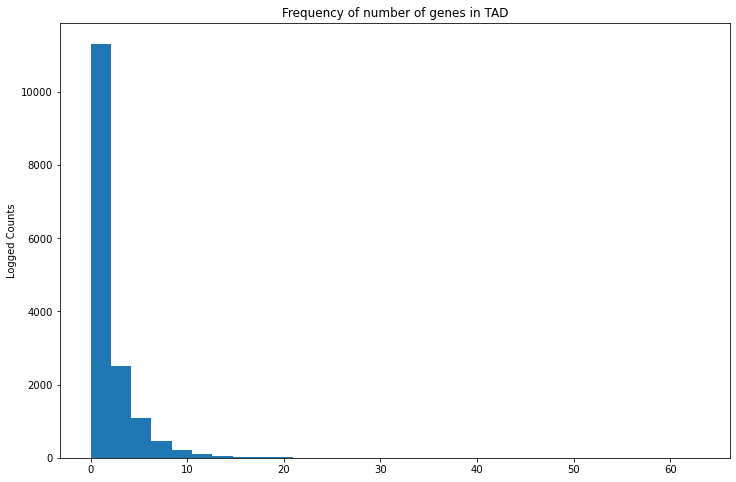

In [41]:
plt.rcParams["figure.figsize"] = (12,8)
plt.hist([len(l) for l in tg_dict.values()],bins=30)
plt.title("Frequency of number of genes in TAD")
plt.ylabel("Logged Counts")
plt.show()